In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30


# 02 결정트리

In [3]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

In [4]:
# 붓꽃 데이터 로딩, 학습과 테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state =11)

# DecisionTreeClassifierabs 학습

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled = True)

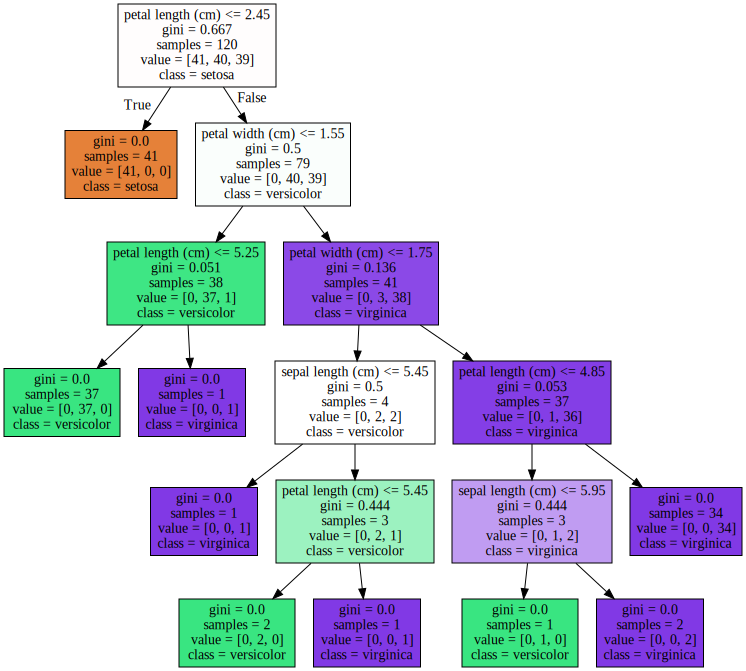

In [7]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Featrue importances : 
 [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

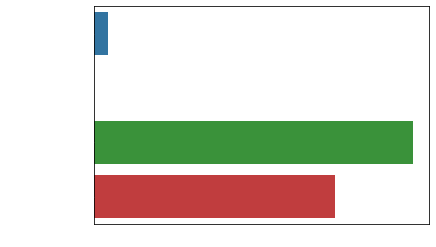

In [19]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Featrue importances : \n {0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name,value))
    
    
# feature importance를 column 별로 시각화하기

sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)
    
    

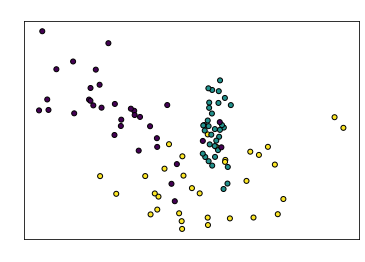

In [31]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state = 0)


# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 새깔로 표시됨

plt.scatter(X_features[:,0], X_features[:,1], marker= "o", c = y_labels, s = 25, edgecolor = "k")

In [34]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

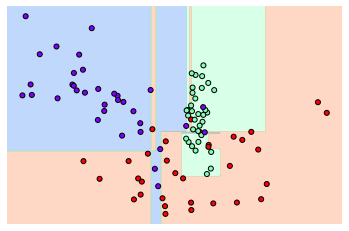

In [36]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 dataframe으로 로드.

feature_name_df = pd.read_csv("./human_activity/features.txt", sep = "\s+", header = None, names = ["column_index", "column_name"])

In [38]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [40]:
# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출

feature_name = feature_name_df.iloc[:,1].values.tolist()
print("전체 피처명에서 10개만 추출", feature_name[:10])

전체 피처명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [58]:
feature_name_df.iloc[:,1].values.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [60]:
feature_dup_df = feature_name_df.groupby(["column_name"]).count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [61]:
feature_dup_df[feature_dup_df["column_index"] > 1].count()

column_index    42
dtype: int64

In [64]:
feature_dup_df[feature_dup_df["column_index"] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [119]:
def get_new_feature_name_df(old_feature_name_df):
    
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby(["column_name"]).cumcount(),
                                 columns = ["dup_cnt"])
    
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = "outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0] + "-" + str(x[1]) if x[1] >0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis = 1)
    
    return new_feature_name_df

In [120]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [123]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [127]:
y_train["action"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도  : {0:.4f}".format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터 : \n", dt_clf.get_params())

결정 트리 예측 정확도  : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [158]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = "accuracy", cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [159]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그떄의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출

cv_results_df[["param_max_depth", "mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [160]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depth = {} wjdghkreh : {:.4f}".format(depth, accuracy))

max_depth = 6 wjdghkreh : 0.8558
max_depth = 8 wjdghkreh : 0.8707
max_depth = 10 wjdghkreh : 0.8673
max_depth = 12 wjdghkreh : 0.8646
max_depth = 16 wjdghkreh : 0.8575
max_depth = 20 wjdghkreh : 0.8548
max_depth = 24 wjdghkreh : 0.8548


In [162]:
params = {
    "max_depth" : [8,12,16,20],
    "min_samples_split" : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = "accuracy", cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.854879
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [163]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도 : {0:4f}".format(accuracy))

결정 트리 예측 정확도 : 0.871734


In [164]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

In [167]:
best_df_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

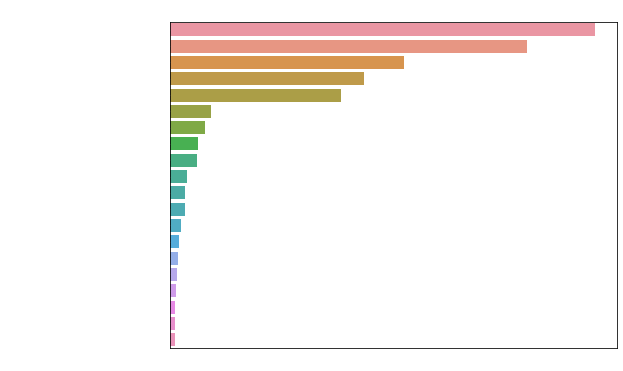

In [168]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seabron)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [170]:
ftr_top20

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64

# 03 앙상블 학습

In [171]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [182]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


In [184]:
lr_clf.__class__.__name__

'LogisticRegression'

In [187]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 dataframe 반환

X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {0:4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.925348


In [191]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [100],
    "max_depth" : [6,8,10,12],
    "min_samples_leaf" : [8,12,18],
    "min_samples_split" : [8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 : \n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [193]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth = 10, min_samples_leaf = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9165


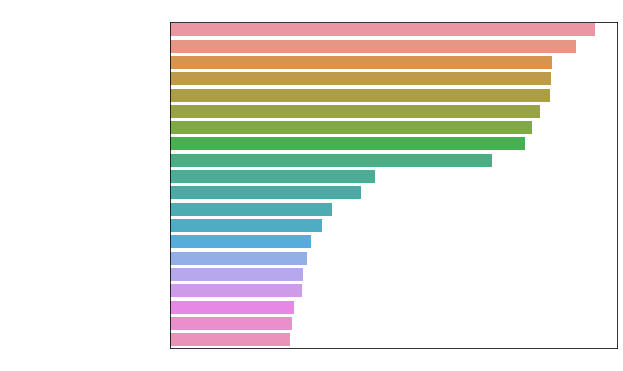

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [195]:
rf_clf1.feature_importances_

array([7.66830533e-05, 1.55108248e-04, 7.50074368e-05, 7.17884758e-03,
       1.96620961e-04, 2.06442129e-04, 3.22956324e-03, 3.21980543e-04,
       2.28984098e-04, 9.04272891e-03, 1.32616538e-04, 1.32368212e-04,
       2.94703130e-04, 1.18378751e-04, 1.23486918e-04, 4.90144138e-04,
       4.77627555e-03, 2.65853003e-04, 2.81876566e-04, 1.95515407e-03,
       1.86928745e-04, 1.74392628e-04, 1.22782025e-03, 9.37013684e-05,
       2.16185561e-04, 1.06768642e-04, 4.82331868e-05, 5.25599737e-05,
       8.96993733e-05, 1.10738368e-04, 4.60237122e-05, 4.03838481e-05,
       1.07309054e-04, 6.50333000e-05, 5.51415166e-05, 5.16006595e-05,
       8.60156938e-05, 5.77401271e-03, 7.61995014e-04, 2.65217763e-03,
       2.71256255e-02, 3.09859024e-02, 9.26969485e-03, 2.13319991e-03,
       1.17409402e-03, 2.66265583e-04, 1.40499009e-03, 1.03313224e-03,
       2.48777608e-04, 2.76484181e-02, 2.45522042e-02, 1.23520886e-02,
       3.24873637e-02, 2.91880885e-02, 8.58912448e-03, 4.64208742e-03,
      

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 616.5 초 


In [197]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

# 06 XGBoost

In [198]:
import xgboost

print(xgboost.__version__)

1.5.1


In [201]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [202]:
cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df["target"] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [203]:
print(dataset.target_names)
print(cancer_df["target"].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [204]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state =156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [212]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [213]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [214]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [215]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [217]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

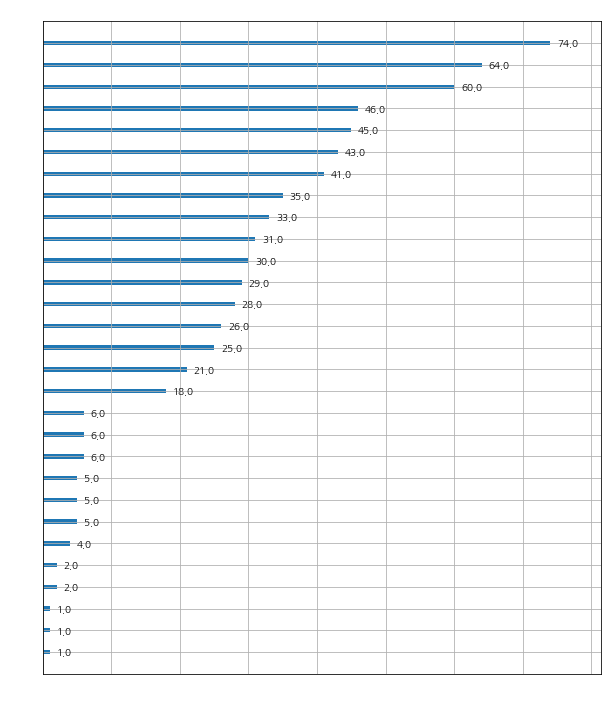

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [219]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[16:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [220]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [221]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [222]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [223]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

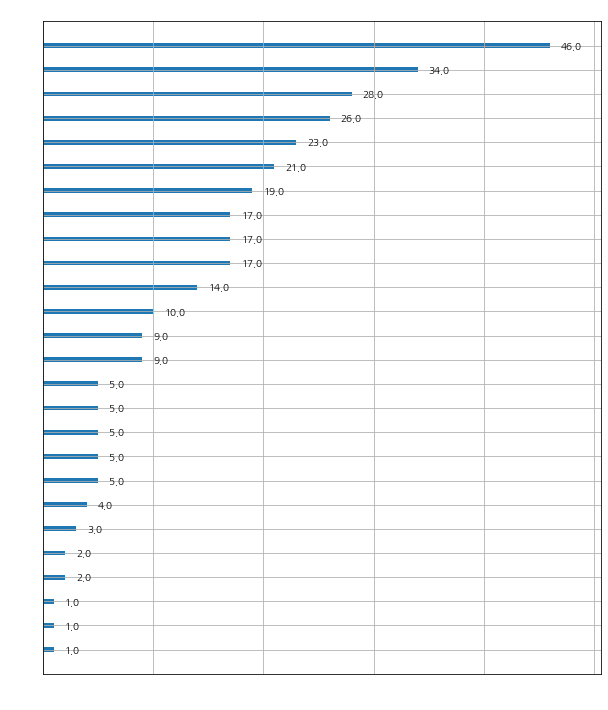

In [224]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

# 07 LightGBM

In [227]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

datsets = load_breast_cancer()
ftr = dataset.data
target = dataset.target

In [228]:
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="logloss", eval_set=evals, verbose = True)

pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [229]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

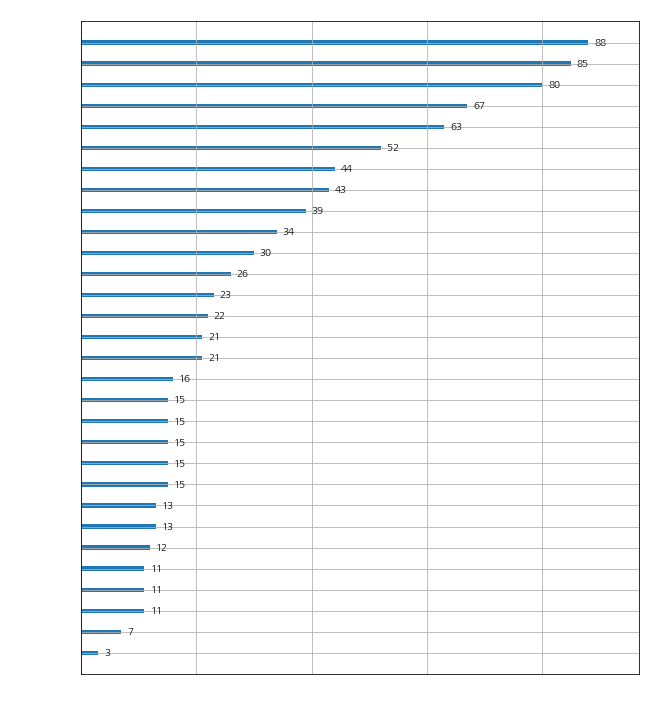

In [230]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper,ax=ax)

# 08 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cust_df = pd.read_csv("./Santander_Customer_Satisfaction/train_santander.csv", encoding="latin-1")
print("dataset shape : " , cust_df.shape)
cust_df.head(3)

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
print(cust_df["TARGET"].value_counts())

unsatisfied_cnt = cust_df[cust_df["TARGET"] == 1].TARGET.count()

total_cnt = cust_df.TARGET.count()

print("unsatisfied 비율은 {0:2f}".format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.039569


In [13]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
cust_df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
cust_df["var3"].replace(-99999,2,inplace = True)
cust_df.drop("ID", axis = 1, inplace = True)

In [20]:
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]

print("피처 데이터 shape : {0}".format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape : {0}, 테스트 세트 Shape : {1}".format(X_train.shape, X_test.shape))

print("학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)

print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/ test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf =XGBClassifier(n_estimators = 500, random_state = 156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_train, y_train),(X_test,y_test)])

[0]	validation_0-auc:0.82005	validation_1-auc:0.81163
[1]	validation_0-auc:0.83400	validation_1-auc:0.82457
[2]	validation_0-auc:0.83870	validation_1-auc:0.82748
[3]	validation_0-auc:0.84419	validation_1-auc:0.82925
[4]	validation_0-auc:0.84786	validation_1-auc:0.83300
[5]	validation_0-auc:0.85150	validation_1-auc:0.83457
[6]	validation_0-auc:0.85468	validation_1-auc:0.83603
[7]	validation_0-auc:0.85832	validation_1-auc:0.83773
[8]	validation_0-auc:0.86124	validation_1-auc:0.83915
[9]	validation_0-auc:0.86460	validation_1-auc:0.84070
[10]	validation_0-auc:0.86733	validation_1-auc:0.84159
[11]	validation_0-auc:0.86992	validation_1-auc:0.84219
[12]	validation_0-auc:0.87259	validation_1-auc:0.84194
[13]	validation_0-auc:0.87587	validation_1-auc:0.84155
[14]	validation_0-auc:0.87884	validation_1-auc:0.84316
[15]	validation_0-auc:0.88129	validation_1-auc:0.84273
[16]	validation_0-auc:0.88272	validation_1-auc:0.84203
[17]	validation_0-auc:0.88410	validation_1-auc:0.84263
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average="macro")

In [36]:
xgb_clf.predict_proba(X_test)[:,1]

array([0.00644276, 0.02234824, 0.01072643, ..., 0.10139827, 0.02410144,
       0.01784029], dtype=float32)

In [37]:
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8432


In [39]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {
    "max_depth" : [5,7],
    "min_child_weight" : [1,3],
    "colsample_bytree" : [0.5,0.75]
}

gridcv = GridSearchCV(xgb_clf, param_grid = params, cv = 3)

gridcv.fit(X_train,y_train, early_stopping_rounds = 30, eval_metric = "auc", eval_set =[(X_train, y_train),(X_test,y_test)])

print("GridSearchCV 최적 파라미터 : ", gridcv.best_params_)

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85718	validation_1-auc:0.83696
[15]	validation_0-auc:0.85851	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86091	validation_1-auc:0.83570
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80013	validation_1-auc:0.79685
[1]	validation_0-auc:0.82084	validation_1-auc:0.81574
[2]	validation_0-auc:0.82744	validation_1-auc:0.82189
[3]	validation_0-auc:0.83029	validation_1-auc:0.82317
[4]	validation_0-auc:0.83578	validation_1-auc:0.82564
[5]	validation_0-auc:0.83777	validation_1-auc:0.83385
[6]	validation_0-auc:0.83742	validation_1-auc:0.83162
[7]	validation_0-auc:0.84373	validation_1-auc:0.83436
[8]	validation_0-auc:0.84836	validation_1-auc:0.83664
[9]	validation_0-auc:0.84790	validation_1-auc:0.83583
[10]	validation_0-auc:0.84717	validation_1-auc:0.83268
[11]	validation_0-auc:0.84653	validation_1-auc:0.83066
[12]	validation_0-auc:0.85376	validation_1-auc:0.83579
[13]	validation_0-auc:0.85799	validation_1-auc:0.83859
[14]	validation_0-auc:0.85962	validation_1-auc:0.83984
[15]	validation_0-auc:0.86143	validation_1-auc:0.84006
[16]	validation_0-auc:0.86297	validation_1-auc:0.84069
[17]	validation_0-auc:0.86426	validation_1-auc:0.84024
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80039	validation_1-auc:0.80013
[1]	validation_0-auc:0.82111	validation_1-auc:0.82026
[2]	validation_0-auc:0.82749	validation_1-auc:0.82627
[3]	validation_0-auc:0.83124	validation_1-auc:0.82830
[4]	validation_0-auc:0.83475	validation_1-auc:0.82881
[5]	validation_0-auc:0.83676	validation_1-auc:0.83385
[6]	validation_0-auc:0.83648	validation_1-auc:0.83085
[7]	validation_0-auc:0.84336	validation_1-auc:0.83472
[8]	validation_0-auc:0.84624	validation_1-auc:0.83404
[9]	validation_0-auc:0.84541	validation_1-auc:0.83287
[10]	validation_0-auc:0.84554	validation_1-auc:0.83039
[11]	validation_0-auc:0.84525	validation_1-auc:0.82995
[12]	validation_0-auc:0.85144	validation_1-auc:0.83489
[13]	validation_0-auc:0.85525	validation_1-auc:0.83803
[14]	validation_0-auc:0.85745	validation_1-auc:0.84145
[15]	validation_0-auc:0.85817	validation_1-auc:0.84082
[16]	validation_0-auc:0.86006	validation_1-auc:0.84076
[17]	validation_0-auc:0.86127	validation_1-auc:0.84139
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82937
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-auc:0.85457	validation_1-auc:0.83785
[14]	validation_0-auc:0.85645	validation_1-auc:0.83894
[15]	validation_0-auc:0.85744	validation_1-auc:0.83784
[16]	validation_0-auc:0.85870	validation_1-auc:0.83899
[17]	validation_0-auc:0.86002	validation_1-auc:0.83854
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79931	validation_1-auc:0.79594
[1]	validation_0-auc:0.81987	validation_1-auc:0.81503
[2]	validation_0-auc:0.82734	validation_1-auc:0.82126
[3]	validation_0-auc:0.83110	validation_1-auc:0.82302
[4]	validation_0-auc:0.83608	validation_1-auc:0.82494
[5]	validation_0-auc:0.83914	validation_1-auc:0.83100
[6]	validation_0-auc:0.83828	validation_1-auc:0.82999
[7]	validation_0-auc:0.84425	validation_1-auc:0.83439
[8]	validation_0-auc:0.84749	validation_1-auc:0.83609
[9]	validation_0-auc:0.84727	validation_1-auc:0.83597
[10]	validation_0-auc:0.84703	validation_1-auc:0.83250
[11]	validation_0-auc:0.84664	validation_1-auc:0.83237
[12]	validation_0-auc:0.85343	validation_1-auc:0.83713
[13]	validation_0-auc:0.85671	validation_1-auc:0.83887
[14]	validation_0-auc:0.85824	validation_1-auc:0.83919
[15]	validation_0-auc:0.85962	validation_1-auc:0.83905
[16]	validation_0-auc:0.86089	validation_1-auc:0.84031
[17]	validation_0-auc:0.86216	validation_1-auc:0.84051
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80248	validation_1-auc:0.80001
[1]	validation_0-auc:0.82249	validation_1-auc:0.81765
[2]	validation_0-auc:0.82833	validation_1-auc:0.82524
[3]	validation_0-auc:0.83371	validation_1-auc:0.82814
[4]	validation_0-auc:0.83653	validation_1-auc:0.82856
[5]	validation_0-auc:0.83838	validation_1-auc:0.83345
[6]	validation_0-auc:0.83823	validation_1-auc:0.83165
[7]	validation_0-auc:0.84386	validation_1-auc:0.83505
[8]	validation_0-auc:0.84688	validation_1-auc:0.83507
[9]	validation_0-auc:0.84634	validation_1-auc:0.83483
[10]	validation_0-auc:0.84564	validation_1-auc:0.83324
[11]	validation_0-auc:0.84501	validation_1-auc:0.83283
[12]	validation_0-auc:0.85011	validation_1-auc:0.83693
[13]	validation_0-auc:0.85299	validation_1-auc:0.83995
[14]	validation_0-auc:0.85523	validation_1-auc:0.84250
[15]	validation_0-auc:0.85608	validation_1-auc:0.84183
[16]	validation_0-auc:0.85748	validation_1-auc:0.84319
[17]	validation_0-auc:0.85895	validation_1-auc:0.84363
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83625	validation_1-auc:0.82577
[4]	validation_0-auc:0.84145	validation_1-auc:0.82827
[5]	validation_0-auc:0.84425	validation_1-auc:0.83317
[6]	validation_0-auc:0.84454	validation_1-auc:0.82823
[7]	validation_0-auc:0.85368	validation_1-auc:0.83176
[8]	validation_0-auc:0.85904	validation_1-auc:0.83544
[9]	validation_0-auc:0.85883	validation_1-auc:0.82847
[10]	validation_0-auc:0.85896	validation_1-auc:0.82719
[11]	validation_0-auc:0.85949	validation_1-auc:0.82626
[12]	validation_0-auc:0.86534	validation_1-auc:0.82900
[13]	validation_0-auc:0.86994	validation_1-auc:0.83274
[14]	validation_0-auc:0.87186	validation_1-auc:0.83340
[15]	validation_0-auc:0.87291	validation_1-auc:0.83077
[16]	validation_0-auc:0.87470	validation_1-auc:0.83213
[17]	validation_0-auc:0.87648	validation_1-auc:0.83230
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81304	validation_1-auc:0.81746
[1]	validation_0-auc:0.82857	validation_1-auc:0.82037
[2]	validation_0-auc:0.83592	validation_1-auc:0.82473
[3]	validation_0-auc:0.84019	validation_1-auc:0.82830
[4]	validation_0-auc:0.84741	validation_1-auc:0.83134
[5]	validation_0-auc:0.84928	validation_1-auc:0.83593
[6]	validation_0-auc:0.85103	validation_1-auc:0.83169
[7]	validation_0-auc:0.85820	validation_1-auc:0.83472
[8]	validation_0-auc:0.86362	validation_1-auc:0.83639
[9]	validation_0-auc:0.86354	validation_1-auc:0.83551
[10]	validation_0-auc:0.86388	validation_1-auc:0.83128
[11]	validation_0-auc:0.86437	validation_1-auc:0.83000
[12]	validation_0-auc:0.87121	validation_1-auc:0.83415
[13]	validation_0-auc:0.87564	validation_1-auc:0.83763
[14]	validation_0-auc:0.87816	validation_1-auc:0.83813
[15]	validation_0-auc:0.88023	validation_1-auc:0.83620
[16]	validation_0-auc:0.88251	validation_1-auc:0.83769
[17]	validation_0-auc:0.88406	validation_1-auc:0.83832
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81393	validation_1-auc:0.81377
[1]	validation_0-auc:0.82962	validation_1-auc:0.82668
[2]	validation_0-auc:0.83724	validation_1-auc:0.83017
[3]	validation_0-auc:0.84075	validation_1-auc:0.83079
[4]	validation_0-auc:0.84691	validation_1-auc:0.83337
[5]	validation_0-auc:0.84896	validation_1-auc:0.83502
[6]	validation_0-auc:0.84980	validation_1-auc:0.82858
[7]	validation_0-auc:0.85918	validation_1-auc:0.83358
[8]	validation_0-auc:0.86284	validation_1-auc:0.83470
[9]	validation_0-auc:0.86365	validation_1-auc:0.83427
[10]	validation_0-auc:0.86243	validation_1-auc:0.83264
[11]	validation_0-auc:0.86248	validation_1-auc:0.83255
[12]	validation_0-auc:0.86973	validation_1-auc:0.83514
[13]	validation_0-auc:0.87456	validation_1-auc:0.83759
[14]	validation_0-auc:0.87634	validation_1-auc:0.83922
[15]	validation_0-auc:0.87828	validation_1-auc:0.83671
[16]	validation_0-auc:0.87991	validation_1-auc:0.83844
[17]	validation_0-auc:0.88291	validation_1-auc:0.83803
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80901	validation_1-auc:0.80653
[1]	validation_0-auc:0.82713	validation_1-auc:0.82150
[2]	validation_0-auc:0.83227	validation_1-auc:0.82513
[3]	validation_0-auc:0.83319	validation_1-auc:0.82525
[4]	validation_0-auc:0.83790	validation_1-auc:0.82809
[5]	validation_0-auc:0.84101	validation_1-auc:0.82978
[6]	validation_0-auc:0.84424	validation_1-auc:0.82639
[7]	validation_0-auc:0.85310	validation_1-auc:0.83443
[8]	validation_0-auc:0.85884	validation_1-auc:0.83779
[9]	validation_0-auc:0.85895	validation_1-auc:0.83430
[10]	validation_0-auc:0.85668	validation_1-auc:0.83222
[11]	validation_0-auc:0.85720	validation_1-auc:0.83069
[12]	validation_0-auc:0.86275	validation_1-auc:0.83549
[13]	validation_0-auc:0.86758	validation_1-auc:0.83728
[14]	validation_0-auc:0.86938	validation_1-auc:0.83912
[15]	validation_0-auc:0.87029	validation_1-auc:0.83611
[16]	validation_0-auc:0.87159	validation_1-auc:0.83649
[17]	validation_0-auc:0.87322	validation_1-auc:0.83643
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81176	validation_1-auc:0.80947
[1]	validation_0-auc:0.82655	validation_1-auc:0.82282
[2]	validation_0-auc:0.83553	validation_1-auc:0.82708
[3]	validation_0-auc:0.83839	validation_1-auc:0.82857
[4]	validation_0-auc:0.84789	validation_1-auc:0.82941
[5]	validation_0-auc:0.84959	validation_1-auc:0.83339
[6]	validation_0-auc:0.84942	validation_1-auc:0.83011
[7]	validation_0-auc:0.85460	validation_1-auc:0.83382
[8]	validation_0-auc:0.85909	validation_1-auc:0.83679
[9]	validation_0-auc:0.85877	validation_1-auc:0.83719
[10]	validation_0-auc:0.85812	validation_1-auc:0.83426
[11]	validation_0-auc:0.85861	validation_1-auc:0.83445
[12]	validation_0-auc:0.86506	validation_1-auc:0.83817
[13]	validation_0-auc:0.86857	validation_1-auc:0.83993
[14]	validation_0-auc:0.87129	validation_1-auc:0.84098
[15]	validation_0-auc:0.87263	validation_1-auc:0.83901
[16]	validation_0-auc:0.87443	validation_1-auc:0.83891
[17]	validation_0-auc:0.87534	validation_1-auc:0.83920
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81519	validation_1-auc:0.81115
[1]	validation_0-auc:0.83201	validation_1-auc:0.82366
[2]	validation_0-auc:0.83718	validation_1-auc:0.83029
[3]	validation_0-auc:0.84145	validation_1-auc:0.83163
[4]	validation_0-auc:0.84628	validation_1-auc:0.83410
[5]	validation_0-auc:0.84792	validation_1-auc:0.83694
[6]	validation_0-auc:0.84780	validation_1-auc:0.83116
[7]	validation_0-auc:0.85599	validation_1-auc:0.83759
[8]	validation_0-auc:0.85905	validation_1-auc:0.83700
[9]	validation_0-auc:0.85860	validation_1-auc:0.83638
[10]	validation_0-auc:0.85875	validation_1-auc:0.83594
[11]	validation_0-auc:0.85929	validation_1-auc:0.83694
[12]	validation_0-auc:0.86567	validation_1-auc:0.84079
[13]	validation_0-auc:0.86949	validation_1-auc:0.84373
[14]	validation_0-auc:0.87108	validation_1-auc:0.84539
[15]	validation_0-auc:0.87172	validation_1-auc:0.84460
[16]	validation_0-auc:0.87353	validation_1-auc:0.84501
[17]	validation_0-auc:0.87466	validation_1-auc:0.84437
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81007	validation_1-auc:0.80693
[1]	validation_0-auc:0.82137	validation_1-auc:0.81877
[2]	validation_0-auc:0.82976	validation_1-auc:0.82498
[3]	validation_0-auc:0.83120	validation_1-auc:0.82212
[4]	validation_0-auc:0.83382	validation_1-auc:0.82481
[5]	validation_0-auc:0.83696	validation_1-auc:0.82672
[6]	validation_0-auc:0.83976	validation_1-auc:0.83016
[7]	validation_0-auc:0.84177	validation_1-auc:0.83330
[8]	validation_0-auc:0.84585	validation_1-auc:0.83282
[9]	validation_0-auc:0.84984	validation_1-auc:0.83519
[10]	validation_0-auc:0.85146	validation_1-auc:0.83530
[11]	validation_0-auc:0.85113	validation_1-auc:0.83380
[12]	validation_0-auc:0.85502	validation_1-auc:0.83622
[13]	validation_0-auc:0.85797	validation_1-auc:0.83644
[14]	validation_0-auc:0.85990	validation_1-auc:0.83686
[15]	validation_0-auc:0.86114	validation_1-auc:0.83639
[16]	validation_0-auc:0.86158	validation_1-auc:0.83602
[17]	validation_0-auc:0.86285	validation_1-auc:0.83501
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80863	validation_1-auc:0.80010
[1]	validation_0-auc:0.82349	validation_1-auc:0.81717
[2]	validation_0-auc:0.82654	validation_1-auc:0.81737
[3]	validation_0-auc:0.82988	validation_1-auc:0.82281
[4]	validation_0-auc:0.83570	validation_1-auc:0.82554
[5]	validation_0-auc:0.83917	validation_1-auc:0.82930
[6]	validation_0-auc:0.84492	validation_1-auc:0.83396
[7]	validation_0-auc:0.84657	validation_1-auc:0.83569
[8]	validation_0-auc:0.84837	validation_1-auc:0.83476
[9]	validation_0-auc:0.85010	validation_1-auc:0.83841
[10]	validation_0-auc:0.85017	validation_1-auc:0.83887
[11]	validation_0-auc:0.85091	validation_1-auc:0.83723
[12]	validation_0-auc:0.85584	validation_1-auc:0.83976
[13]	validation_0-auc:0.85900	validation_1-auc:0.84063
[14]	validation_0-auc:0.86059	validation_1-auc:0.84054
[15]	validation_0-auc:0.86167	validation_1-auc:0.84086
[16]	validation_0-auc:0.86303	validation_1-auc:0.84085
[17]	validation_0-auc:0.86383	validation_1-auc:0.83947
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81815
[1]	validation_0-auc:0.82547	validation_1-auc:0.82159
[2]	validation_0-auc:0.83019	validation_1-auc:0.82631
[3]	validation_0-auc:0.83230	validation_1-auc:0.82660
[4]	validation_0-auc:0.83488	validation_1-auc:0.82988
[5]	validation_0-auc:0.83888	validation_1-auc:0.83262
[6]	validation_0-auc:0.84242	validation_1-auc:0.83408
[7]	validation_0-auc:0.84581	validation_1-auc:0.83560
[8]	validation_0-auc:0.84775	validation_1-auc:0.83617
[9]	validation_0-auc:0.84989	validation_1-auc:0.83746
[10]	validation_0-auc:0.85052	validation_1-auc:0.83816
[11]	validation_0-auc:0.84982	validation_1-auc:0.83603
[12]	validation_0-auc:0.85408	validation_1-auc:0.83825
[13]	validation_0-auc:0.85547	validation_1-auc:0.83955
[14]	validation_0-auc:0.85818	validation_1-auc:0.84292
[15]	validation_0-auc:0.85990	validation_1-auc:0.84361
[16]	validation_0-auc:0.86142	validation_1-auc:0.84287
[17]	validation_0-auc:0.86247	validation_1-auc:0.84280
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81105	validation_1-auc:0.80637
[1]	validation_0-auc:0.82008	validation_1-auc:0.81881
[2]	validation_0-auc:0.82922	validation_1-auc:0.82532
[3]	validation_0-auc:0.83159	validation_1-auc:0.82594
[4]	validation_0-auc:0.83378	validation_1-auc:0.82618
[5]	validation_0-auc:0.83671	validation_1-auc:0.82887
[6]	validation_0-auc:0.84111	validation_1-auc:0.83302
[7]	validation_0-auc:0.84227	validation_1-auc:0.83380
[8]	validation_0-auc:0.84422	validation_1-auc:0.83346
[9]	validation_0-auc:0.84742	validation_1-auc:0.83581
[10]	validation_0-auc:0.84984	validation_1-auc:0.83563
[11]	validation_0-auc:0.84933	validation_1-auc:0.83344
[12]	validation_0-auc:0.85285	validation_1-auc:0.83653
[13]	validation_0-auc:0.85494	validation_1-auc:0.83796
[14]	validation_0-auc:0.85653	validation_1-auc:0.83880
[15]	validation_0-auc:0.85803	validation_1-auc:0.83841
[16]	validation_0-auc:0.85922	validation_1-auc:0.83773
[17]	validation_0-auc:0.85983	validation_1-auc:0.83709
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81067	validation_1-auc:0.81109
[1]	validation_0-auc:0.82045	validation_1-auc:0.81627
[2]	validation_0-auc:0.82760	validation_1-auc:0.82116
[3]	validation_0-auc:0.82925	validation_1-auc:0.81730
[4]	validation_0-auc:0.83628	validation_1-auc:0.82554
[5]	validation_0-auc:0.83889	validation_1-auc:0.82992
[6]	validation_0-auc:0.84258	validation_1-auc:0.83304
[7]	validation_0-auc:0.84515	validation_1-auc:0.83327
[8]	validation_0-auc:0.84797	validation_1-auc:0.83479
[9]	validation_0-auc:0.84982	validation_1-auc:0.83737
[10]	validation_0-auc:0.84996	validation_1-auc:0.83746
[11]	validation_0-auc:0.84929	validation_1-auc:0.83715
[12]	validation_0-auc:0.85506	validation_1-auc:0.83957
[13]	validation_0-auc:0.85817	validation_1-auc:0.84131
[14]	validation_0-auc:0.85945	validation_1-auc:0.84041
[15]	validation_0-auc:0.86040	validation_1-auc:0.83984
[16]	validation_0-auc:0.86127	validation_1-auc:0.83954
[17]	validation_0-auc:0.86170	validation_1-auc:0.83947
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81835	validation_1-auc:0.81691
[1]	validation_0-auc:0.82862	validation_1-auc:0.82346
[2]	validation_0-auc:0.83280	validation_1-auc:0.82893
[3]	validation_0-auc:0.83563	validation_1-auc:0.82931
[4]	validation_0-auc:0.83780	validation_1-auc:0.83200
[5]	validation_0-auc:0.83975	validation_1-auc:0.83280
[6]	validation_0-auc:0.84205	validation_1-auc:0.83374
[7]	validation_0-auc:0.84453	validation_1-auc:0.83256
[8]	validation_0-auc:0.84638	validation_1-auc:0.83384
[9]	validation_0-auc:0.84986	validation_1-auc:0.83670
[10]	validation_0-auc:0.85058	validation_1-auc:0.83825
[11]	validation_0-auc:0.84986	validation_1-auc:0.83646
[12]	validation_0-auc:0.85321	validation_1-auc:0.83744
[13]	validation_0-auc:0.85478	validation_1-auc:0.83942
[14]	validation_0-auc:0.85613	validation_1-auc:0.84091
[15]	validation_0-auc:0.85709	validation_1-auc:0.84170
[16]	validation_0-auc:0.85891	validation_1-auc:0.84239
[17]	validation_0-auc:0.86023	validation_1-auc:0.84215
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81685	validation_1-auc:0.81075
[1]	validation_0-auc:0.82791	validation_1-auc:0.82283
[2]	validation_0-auc:0.83537	validation_1-auc:0.82615
[3]	validation_0-auc:0.83996	validation_1-auc:0.82712
[4]	validation_0-auc:0.84558	validation_1-auc:0.82791
[5]	validation_0-auc:0.84781	validation_1-auc:0.82977
[6]	validation_0-auc:0.85151	validation_1-auc:0.83373
[7]	validation_0-auc:0.85510	validation_1-auc:0.83453
[8]	validation_0-auc:0.85996	validation_1-auc:0.83602
[9]	validation_0-auc:0.86242	validation_1-auc:0.83834
[10]	validation_0-auc:0.86449	validation_1-auc:0.83482
[11]	validation_0-auc:0.86492	validation_1-auc:0.83100
[12]	validation_0-auc:0.87031	validation_1-auc:0.83352
[13]	validation_0-auc:0.87428	validation_1-auc:0.83408
[14]	validation_0-auc:0.87588	validation_1-auc:0.83527
[15]	validation_0-auc:0.87796	validation_1-auc:0.83333
[16]	validation_0-auc:0.87975	validation_1-auc:0.83372
[17]	validation_0-auc:0.88061	validation_1-auc:0.83262
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81432	validation_1-auc:0.80561
[1]	validation_0-auc:0.82773	validation_1-auc:0.81858
[2]	validation_0-auc:0.83520	validation_1-auc:0.82197
[3]	validation_0-auc:0.84268	validation_1-auc:0.82757
[4]	validation_0-auc:0.84815	validation_1-auc:0.83068
[5]	validation_0-auc:0.85345	validation_1-auc:0.83319
[6]	validation_0-auc:0.85971	validation_1-auc:0.83530
[7]	validation_0-auc:0.86284	validation_1-auc:0.83831
[8]	validation_0-auc:0.86543	validation_1-auc:0.83884
[9]	validation_0-auc:0.86785	validation_1-auc:0.84067
[10]	validation_0-auc:0.86895	validation_1-auc:0.84079
[11]	validation_0-auc:0.86889	validation_1-auc:0.83763
[12]	validation_0-auc:0.87445	validation_1-auc:0.83969
[13]	validation_0-auc:0.87848	validation_1-auc:0.83798
[14]	validation_0-auc:0.88016	validation_1-auc:0.83964
[15]	validation_0-auc:0.88262	validation_1-auc:0.83991
[16]	validation_0-auc:0.88412	validation_1-auc:0.84062
[17]	validation_0-auc:0.88476	validation_1-auc:0.84051
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82507	validation_1-auc:0.81932
[1]	validation_0-auc:0.83077	validation_1-auc:0.82081
[2]	validation_0-auc:0.83704	validation_1-auc:0.82829
[3]	validation_0-auc:0.84184	validation_1-auc:0.83011
[4]	validation_0-auc:0.84747	validation_1-auc:0.83438
[5]	validation_0-auc:0.85320	validation_1-auc:0.83489
[6]	validation_0-auc:0.85706	validation_1-auc:0.83487
[7]	validation_0-auc:0.86253	validation_1-auc:0.83489
[8]	validation_0-auc:0.86436	validation_1-auc:0.83406
[9]	validation_0-auc:0.86657	validation_1-auc:0.83491
[10]	validation_0-auc:0.86829	validation_1-auc:0.83443
[11]	validation_0-auc:0.86897	validation_1-auc:0.83444
[12]	validation_0-auc:0.87503	validation_1-auc:0.83503
[13]	validation_0-auc:0.87831	validation_1-auc:0.83536
[14]	validation_0-auc:0.88110	validation_1-auc:0.83748
[15]	validation_0-auc:0.88266	validation_1-auc:0.83845
[16]	validation_0-auc:0.88497	validation_1-auc:0.83678
[17]	validation_0-auc:0.88674	validation_1-auc:0.83637
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81664	validation_1-auc:0.81074
[1]	validation_0-auc:0.83122	validation_1-auc:0.82620
[2]	validation_0-auc:0.83368	validation_1-auc:0.82978
[3]	validation_0-auc:0.83631	validation_1-auc:0.82844
[4]	validation_0-auc:0.83974	validation_1-auc:0.82929
[5]	validation_0-auc:0.84469	validation_1-auc:0.83164
[6]	validation_0-auc:0.85028	validation_1-auc:0.83263
[7]	validation_0-auc:0.85460	validation_1-auc:0.83312
[8]	validation_0-auc:0.85808	validation_1-auc:0.83513
[9]	validation_0-auc:0.86156	validation_1-auc:0.83608
[10]	validation_0-auc:0.86348	validation_1-auc:0.83393
[11]	validation_0-auc:0.86450	validation_1-auc:0.83101
[12]	validation_0-auc:0.86796	validation_1-auc:0.83297
[13]	validation_0-auc:0.87029	validation_1-auc:0.83379
[14]	validation_0-auc:0.87203	validation_1-auc:0.83416
[15]	validation_0-auc:0.87399	validation_1-auc:0.83454
[16]	validation_0-auc:0.87505	validation_1-auc:0.83339
[17]	validation_0-auc:0.87548	validation_1-auc:0.83294
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81435	validation_1-auc:0.81417
[1]	validation_0-auc:0.82683	validation_1-auc:0.81889
[2]	validation_0-auc:0.83600	validation_1-auc:0.82603
[3]	validation_0-auc:0.83951	validation_1-auc:0.82593
[4]	validation_0-auc:0.84599	validation_1-auc:0.83184
[5]	validation_0-auc:0.84952	validation_1-auc:0.83242
[6]	validation_0-auc:0.85562	validation_1-auc:0.83685
[7]	validation_0-auc:0.85908	validation_1-auc:0.83671
[8]	validation_0-auc:0.86286	validation_1-auc:0.83685
[9]	validation_0-auc:0.86509	validation_1-auc:0.84035
[10]	validation_0-auc:0.86421	validation_1-auc:0.83964
[11]	validation_0-auc:0.86543	validation_1-auc:0.83511
[12]	validation_0-auc:0.86963	validation_1-auc:0.83989
[13]	validation_0-auc:0.87440	validation_1-auc:0.84002
[14]	validation_0-auc:0.87595	validation_1-auc:0.83998
[15]	validation_0-auc:0.87751	validation_1-auc:0.84059
[16]	validation_0-auc:0.87820	validation_1-auc:0.84068
[17]	validation_0-auc:0.87940	validation_1-auc:0.83966
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82297	validation_1-auc:0.81707
[1]	validation_0-auc:0.83141	validation_1-auc:0.82133
[2]	validation_0-auc:0.83805	validation_1-auc:0.82785
[3]	validation_0-auc:0.84271	validation_1-auc:0.82901
[4]	validation_0-auc:0.84766	validation_1-auc:0.83398
[5]	validation_0-auc:0.85126	validation_1-auc:0.83381
[6]	validation_0-auc:0.85486	validation_1-auc:0.83360
[7]	validation_0-auc:0.85943	validation_1-auc:0.83287
[8]	validation_0-auc:0.86243	validation_1-auc:0.83187
[9]	validation_0-auc:0.86500	validation_1-auc:0.83304
[10]	validation_0-auc:0.86496	validation_1-auc:0.83318
[11]	validation_0-auc:0.86466	validation_1-auc:0.83180
[12]	validation_0-auc:0.87014	validation_1-auc:0.83453
[13]	validation_0-auc:0.87320	validation_1-auc:0.83548
[14]	validation_0-auc:0.87478	validation_1-auc:0.83833
[15]	validation_0-auc:0.87618	validation_1-auc:0.83862
[16]	validation_0-auc:0.87736	validation_1-auc:0.83927
[17]	validation_0-auc:0.87884	validation_1-auc:0.83904
[18]	validation_0-au

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81712	validation_1-auc:0.81271
[1]	validation_0-auc:0.82826	validation_1-auc:0.82280
[2]	validation_0-auc:0.83310	validation_1-auc:0.82684
[3]	validation_0-auc:0.83751	validation_1-auc:0.83103
[4]	validation_0-auc:0.84106	validation_1-auc:0.83200
[5]	validation_0-auc:0.84328	validation_1-auc:0.83326
[6]	validation_0-auc:0.84670	validation_1-auc:0.83462
[7]	validation_0-auc:0.84952	validation_1-auc:0.83560
[8]	validation_0-auc:0.85125	validation_1-auc:0.83756
[9]	validation_0-auc:0.85473	validation_1-auc:0.84003
[10]	validation_0-auc:0.85521	validation_1-auc:0.84139
[11]	validation_0-auc:0.85463	validation_1-auc:0.83872
[12]	validation_0-auc:0.85945	validation_1-auc:0.84096
[13]	validation_0-auc:0.86156	validation_1-auc:0.84218
[14]	validation_0-auc:0.86302	validation_1-auc:0.84377
[15]	validation_0-auc:0.86443	validation_1-auc:0.84367
[16]	validation_0-auc:0.86521	validation_1-auc:0.84351
[17]	validation_0-auc:0.86646	validation_1-auc:0.84337
[18]	validation_0-au

In [40]:
xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1], average = "macro")
print("ROC AUC : {0:4f}".format(xgb_roc_score))

ROC AUC : 0.843773


In [47]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\qkfkd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83976	validation_1-auc:0.82916
[14]	validation_0-auc:0.84155	validation_1-auc:0.83015
[15]	validation_0-auc:0.84440	validation_1-auc:0.83236
[16]	validation_0-auc:0.84484	validation_1-auc:0.83261
[17]	validation_0-auc:0.84462	validation_1-auc:0.83207
[18]	validation_0-au

[149]	validation_0-auc:0.88024	validation_1-auc:0.84340
[150]	validation_0-auc:0.88045	validation_1-auc:0.84346
[151]	validation_0-auc:0.88082	validation_1-auc:0.84364
[152]	validation_0-auc:0.88105	validation_1-auc:0.84359
[153]	validation_0-auc:0.88127	validation_1-auc:0.84364
[154]	validation_0-auc:0.88148	validation_1-auc:0.84363
[155]	validation_0-auc:0.88173	validation_1-auc:0.84372
[156]	validation_0-auc:0.88187	validation_1-auc:0.84376
[157]	validation_0-auc:0.88211	validation_1-auc:0.84374
[158]	validation_0-auc:0.88231	validation_1-auc:0.84379
[159]	validation_0-auc:0.88254	validation_1-auc:0.84374
[160]	validation_0-auc:0.88275	validation_1-auc:0.84379
[161]	validation_0-auc:0.88294	validation_1-auc:0.84373
[162]	validation_0-auc:0.88310	validation_1-auc:0.84369
[163]	validation_0-auc:0.88324	validation_1-auc:0.84367
[164]	validation_0-auc:0.88354	validation_1-auc:0.84370
[165]	validation_0-auc:0.88375	validation_1-auc:0.84378
[166]	validation_0-auc:0.88410	validation_1-auc:

[296]	validation_0-auc:0.90495	validation_1-auc:0.84374
[297]	validation_0-auc:0.90501	validation_1-auc:0.84371
[298]	validation_0-auc:0.90514	validation_1-auc:0.84377
[299]	validation_0-auc:0.90519	validation_1-auc:0.84370
[300]	validation_0-auc:0.90525	validation_1-auc:0.84370
[301]	validation_0-auc:0.90528	validation_1-auc:0.84370
[302]	validation_0-auc:0.90537	validation_1-auc:0.84373
[303]	validation_0-auc:0.90540	validation_1-auc:0.84367
[304]	validation_0-auc:0.90548	validation_1-auc:0.84366
[305]	validation_0-auc:0.90556	validation_1-auc:0.84360
[306]	validation_0-auc:0.90577	validation_1-auc:0.84360
[307]	validation_0-auc:0.90581	validation_1-auc:0.84360
[308]	validation_0-auc:0.90586	validation_1-auc:0.84360
[309]	validation_0-auc:0.90592	validation_1-auc:0.84362
[310]	validation_0-auc:0.90602	validation_1-auc:0.84360
[311]	validation_0-auc:0.90622	validation_1-auc:0.84359
[312]	validation_0-auc:0.90628	validation_1-auc:0.84354
[313]	validation_0-auc:0.90638	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

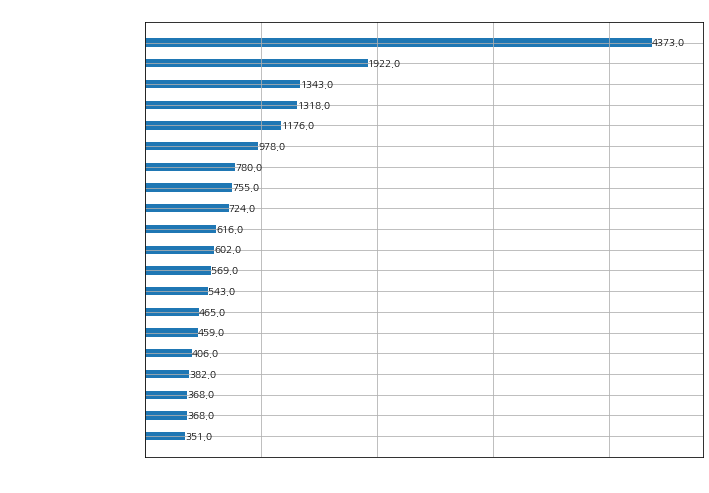

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [51]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.83419	valid_0's binary_logloss: 0.149407
[7]	valid_0's auc: 0.837155	valid_0's binary_logloss: 0.147942
[8]	valid_0's auc: 0.837996	valid_0's binary_logloss: 0.146565
[9]	valid_0's auc: 0.839603	valid_0's binary_logloss: 0.145427
[10]	valid_0's auc: 0.839867	valid_0's binary_logloss: 0.14447
[11]	valid_0's auc: 0.839887	valid_0's binary_logloss: 0.14375
[12]	valid_0's auc: 0.839856	valid_0's binary_logloss: 0.143201
[13]	valid_0's auc: 0.839997	valid_0's binary_logloss: 0.142632
[14]	valid_0's auc: 0.840001	valid_0's binary_logloss: 0.142149
[15]	valid_0's auc: 0.84079	valid_0's binary_logloss: 0.14171
[16]	valid_0's auc: 0.840096	valid_0's binary_logloss:

In [52]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc: 0.872395	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.83287	valid_1's binary_logloss: 0.140682
[29]	valid_0's auc: 0.873543	valid_0's binary_logloss: 0.124513	valid_1's auc: 0.833075	valid_1's binary_logloss: 0.140597
[30]	valid_0's auc: 0.874753	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140521
[31]	valid_0's auc: 0.875422	valid_0's binary_logloss: 0.123916	valid_1's auc: 0.833475	valid_1's binary_logloss: 0.140452
[32]	valid_0's auc:

[23]	valid_0's auc: 0.867894	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.839641	valid_1's binary_logloss: 0.139745
[24]	valid_0's auc: 0.868501	valid_0's binary_logloss: 0.126192	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.139593
[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.872329	valid_0's binary_logloss: 0.124848	valid_1's auc: 0.84012	valid_1's binary_logloss: 0.139258
[29]	valid_0's auc: 0.872967	valid_0's binary_logloss: 0.124555	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139275
[30]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.124266	valid_1's auc: 0.839857	valid_1's binary_logloss: 0.139171
[31]	valid_0's au

[33]	valid_0's auc: 0.891961	valid_0's binary_logloss: 0.117399	valid_1's auc: 0.827735	valid_1's binary_logloss: 0.141855
[34]	valid_0's auc: 0.892749	valid_0's binary_logloss: 0.117017	valid_1's auc: 0.827563	valid_1's binary_logloss: 0.141862
[35]	valid_0's auc: 0.893239	valid_0's binary_logloss: 0.116708	valid_1's auc: 0.827647	valid_1's binary_logloss: 0.141904
[36]	valid_0's auc: 0.894637	valid_0's binary_logloss: 0.116305	valid_1's auc: 0.82772	valid_1's binary_logloss: 0.141958
[37]	valid_0's auc: 0.8953	valid_0's binary_logloss: 0.115979	valid_1's auc: 0.827755	valid_1's binary_logloss: 0.141936
[38]	valid_0's auc: 0.896163	valid_0's binary_logloss: 0.115665	valid_1's auc: 0.828237	valid_1's binary_logloss: 0.14189
[39]	valid_0's auc: 0.896635	valid_0's binary_logloss: 0.115364	valid_1's auc: 0.828298	valid_1's binary_logloss: 0.141936
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.8

[32]	valid_0's auc: 0.89295	valid_0's binary_logloss: 0.117201	valid_1's auc: 0.83626	valid_1's binary_logloss: 0.140355
[33]	valid_0's auc: 0.893816	valid_0's binary_logloss: 0.116828	valid_1's auc: 0.836292	valid_1's binary_logloss: 0.140367
[34]	valid_0's auc: 0.894517	valid_0's binary_logloss: 0.116483	valid_1's auc: 0.835983	valid_1's binary_logloss: 0.140391
[35]	valid_0's auc: 0.895168	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.14032
[36]	valid_0's auc: 0.895858	valid_0's binary_logloss: 0.115773	valid_1's auc: 0.836502	valid_1's binary_logloss: 0.140294
[37]	valid_0's auc: 0.896493	valid_0's binary_logloss: 0.115389	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.140311
[38]	valid_0's auc: 0.897007	valid_0's binary_logloss: 0.115102	valid_1's auc: 0.836557	valid_1's binary_logloss: 0.140361
[39]	valid_0's auc: 0.897534	valid_0's binary_logloss: 0.11481	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.140172
[40]	valid_0's auc: 

[33]	valid_0's auc: 0.891961	valid_0's binary_logloss: 0.117399	valid_1's auc: 0.827735	valid_1's binary_logloss: 0.141855
[34]	valid_0's auc: 0.892749	valid_0's binary_logloss: 0.117017	valid_1's auc: 0.827563	valid_1's binary_logloss: 0.141862
[35]	valid_0's auc: 0.893239	valid_0's binary_logloss: 0.116708	valid_1's auc: 0.827647	valid_1's binary_logloss: 0.141904
[36]	valid_0's auc: 0.894637	valid_0's binary_logloss: 0.116305	valid_1's auc: 0.82772	valid_1's binary_logloss: 0.141958
[37]	valid_0's auc: 0.8953	valid_0's binary_logloss: 0.115979	valid_1's auc: 0.827755	valid_1's binary_logloss: 0.141936
[38]	valid_0's auc: 0.896163	valid_0's binary_logloss: 0.115665	valid_1's auc: 0.828237	valid_1's binary_logloss: 0.14189
[39]	valid_0's auc: 0.896635	valid_0's binary_logloss: 0.115364	valid_1's auc: 0.828298	valid_1's binary_logloss: 0.141936
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.8

[31]	valid_0's auc: 0.892082	valid_0's binary_logloss: 0.117555	valid_1's auc: 0.836092	valid_1's binary_logloss: 0.140387
[32]	valid_0's auc: 0.89295	valid_0's binary_logloss: 0.117201	valid_1's auc: 0.83626	valid_1's binary_logloss: 0.140355
[33]	valid_0's auc: 0.893816	valid_0's binary_logloss: 0.116828	valid_1's auc: 0.836292	valid_1's binary_logloss: 0.140367
[34]	valid_0's auc: 0.894517	valid_0's binary_logloss: 0.116483	valid_1's auc: 0.835983	valid_1's binary_logloss: 0.140391
[35]	valid_0's auc: 0.895168	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.14032
[36]	valid_0's auc: 0.895858	valid_0's binary_logloss: 0.115773	valid_1's auc: 0.836502	valid_1's binary_logloss: 0.140294
[37]	valid_0's auc: 0.896493	valid_0's binary_logloss: 0.115389	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.140311
[38]	valid_0's auc: 0.897007	valid_0's binary_logloss: 0.115102	valid_1's auc: 0.836557	valid_1's binary_logloss: 0.140361
[39]	valid_0's auc:

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[42]	valid_0's auc: 0.879651	valid_0's binary_logloss: 0.12233	valid_1's auc: 0.840322	valid_1's binary_logloss: 0.139211
[43]	valid_0's auc: 0.880193	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840866	valid_1's binary_logloss: 0.139129
[44]	valid_0's auc: 0.880662	valid_0's binary_logloss: 0.121892	valid_1's auc: 0.840688	valid_1's binary_logloss: 0.139125
[45]	valid_0's auc: 0.881011	valid_0's binary_logloss: 0.12172	valid_1's auc: 0.840576	valid_1's binary_logloss: 0.139118
[46]	valid_0's auc: 0.881457	valid_0's binary_logloss: 0.121546	valid_1's auc: 0.840392	valid_1's binary_logloss: 0.139171
[47]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.121351	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.139198
[48]	valid_0's auc: 0.882185	valid_0's binary_logloss: 0.121194	valid_1's auc: 0.840243	valid_1's binary_logloss: 0.139218
[49]	valid_0's auc: 0.882639	valid_0's binary_logloss: 0.121025	valid_1's auc: 0.840033	valid_1's binary_logloss: 0.139243
[50]	valid_0's auc

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[41]	valid_0's auc: 0.879367	valid_0's binary_logloss: 0.122507	valid_1's auc: 0.840187	valid_1's binary_logloss: 0.139246
[42]	valid_0's auc: 0.879651	valid_0's binary_logloss: 0.12233	valid_1's auc: 0.840322	valid_1's binary_logloss: 0.139211
[43]	valid_0's auc: 0.880193	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840866	valid_1's binary_logloss: 0.139129
[44]	valid_0's auc: 0.880662	valid_0's binary_logloss: 0.121892	valid_1's auc: 0.840688	valid_1's binary_logloss: 0.139125
[45]	valid_0's auc: 0.881011	valid_0's binary_logloss: 0.12172	valid_1's auc: 0.840576	valid_1's binary_logloss: 0.139118
[46]	valid_0's auc: 0.881457	valid_0's binary_logloss: 0.121546	valid_1's auc: 0.840392	valid_1's binary_logloss: 0.139171
[47]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.121351	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.139198
[48]	valid_0's auc: 0.882185	valid_0's binary_logloss: 0.121194	valid_1's auc: 0.840243	valid_1's binary_logloss: 0.139218
[49]	valid_0's auc

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[29]	valid_0's auc: 0.886143	valid_0's binary_logloss: 0.120215	valid_1's auc: 0.837539	valid_1's binary_logloss: 0.140081
[30]	valid_0's auc: 0.887168	valid_0's binary_logloss: 0.119789	valid_1's auc: 0.837041	valid_1's binary_logloss: 0.140138
[31]	valid_0's auc: 0.888049	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.837002	valid_1's binary_logloss: 0.14016
[32]	valid_0's auc: 0.889383	valid_0's binary_logloss: 0.11898	valid_1's auc: 0.837145	valid_1's binary_logloss: 0.140133
[33]	valid_0's auc: 0.890218	valid_0's binary_logloss: 0.118615	valid_1's auc: 0.837034	valid_1's binary_logloss: 0.140161
[34]	valid_0's auc: 0.890951	valid_0's binary_logloss: 0.118239	valid_1's auc: 0.836622	valid_1's binary_logloss: 0.140249
[35]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.117845	valid_1's auc: 0.83721	valid_1's binary_logloss: 0.140142
[36]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837329	valid_1's binary_logloss: 0.140085
[37]	valid_0's auc: 0.

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[32]	valid_0's auc: 0.889383	valid_0's binary_logloss: 0.11898	valid_1's auc: 0.837145	valid_1's binary_logloss: 0.140133
[33]	valid_0's auc: 0.890218	valid_0's binary_logloss: 0.118615	valid_1's auc: 0.837034	valid_1's binary_logloss: 0.140161
[34]	valid_0's auc: 0.890951	valid_0's binary_logloss: 0.118239	valid_1's auc: 0.836622	valid_1's binary_logloss: 0.140249
[35]	valid_0's auc: 0.89193	valid_0's binary_logloss: 0.117845	valid_1's auc: 0.83721	valid_1's binary_logloss: 0.140142
[36]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837329	valid_1's binary_logloss: 0.140085
[37]	valid_0's auc: 0.893153	valid_0's binary_logloss: 0.117162	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.140025
[38]	valid_0's auc: 0.893722	valid_0's binary_logloss: 0.116804	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.140069
[39]	valid_0's auc: 0.894287	valid_0's binary_logloss: 0.116502	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.140116
[40]	valid_0's auc: 

[23]	valid_0's auc: 0.867707	valid_0's binary_logloss: 0.126368	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.139784
[24]	valid_0's auc: 0.868204	valid_0's binary_logloss: 0.126013	valid_1's auc: 0.838687	valid_1's binary_logloss: 0.139638
[25]	valid_0's auc: 0.869209	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.838516	valid_1's binary_logloss: 0.139648
[26]	valid_0's auc: 0.869882	valid_0's binary_logloss: 0.125349	valid_1's auc: 0.838249	valid_1's binary_logloss: 0.139599
[27]	valid_0's auc: 0.871011	valid_0's binary_logloss: 0.125023	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.139488
[28]	valid_0's auc: 0.871771	valid_0's binary_logloss: 0.124719	valid_1's auc: 0.838966	valid_1's binary_logloss: 0.139445
[29]	valid_0's auc: 0.872545	valid_0's binary_logloss: 0.124396	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139327
[30]	valid_0's auc: 0.873519	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.839742	valid_1's binary_logloss: 0.139265
[31]	valid_0's au

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[17]	valid_0's auc: 0.876061	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.831586	valid_1's binary_logloss: 0.142141
[18]	valid_0's auc: 0.876982	valid_0's binary_logloss: 0.124313	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.142066
[19]	valid_0's auc: 0.87791	valid_0's binary_logloss: 0.123702	valid_1's auc: 0.830449	valid_1's binary_logloss: 0.141962
[20]	valid_0's auc: 0.879418	valid_0's binary_logloss: 0.12308	valid_1's auc: 0.830029	valid_1's binary_logloss: 0.141962
[21]	valid_0's auc: 0.880585	valid_0's binary_logloss: 0.122495	valid_1's auc: 0.829857	valid_1's binary_logloss: 0.141925
[22]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.121947	valid_1's auc: 0.829196	valid_1's binary_logloss: 0.141909
[23]	valid_0's auc: 0.883098	valid_0's binary_logloss: 0.121442	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.141881
[24]	valid_0's auc: 0.883717	valid_0's binary_logloss: 0.120986	valid_1's auc: 0.829008	valid_1's binary_logloss: 0.141834
[25]	valid_0's auc

[16]	valid_0's auc: 0.875931	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.141684
[17]	valid_0's auc: 0.876854	valid_0's binary_logloss: 0.124918	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.141524
[18]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.141285
[19]	valid_0's auc: 0.879125	valid_0's binary_logloss: 0.123553	valid_1's auc: 0.835877	valid_1's binary_logloss: 0.141128
[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883621	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.140596
[24]	valid_0's a

[17]	valid_0's auc: 0.876061	valid_0's binary_logloss: 0.124928	valid_1's auc: 0.831586	valid_1's binary_logloss: 0.142141
[18]	valid_0's auc: 0.876982	valid_0's binary_logloss: 0.124313	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.142066
[19]	valid_0's auc: 0.87791	valid_0's binary_logloss: 0.123702	valid_1's auc: 0.830449	valid_1's binary_logloss: 0.141962
[20]	valid_0's auc: 0.879418	valid_0's binary_logloss: 0.12308	valid_1's auc: 0.830029	valid_1's binary_logloss: 0.141962
[21]	valid_0's auc: 0.880585	valid_0's binary_logloss: 0.122495	valid_1's auc: 0.829857	valid_1's binary_logloss: 0.141925
[22]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.121947	valid_1's auc: 0.829196	valid_1's binary_logloss: 0.141909
[23]	valid_0's auc: 0.883098	valid_0's binary_logloss: 0.121442	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.141881
[24]	valid_0's auc: 0.883717	valid_0's binary_logloss: 0.120986	valid_1's auc: 0.829008	valid_1's binary_logloss: 0.141834
[25]	valid_0's auc

[16]	valid_0's auc: 0.875931	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.141684
[17]	valid_0's auc: 0.876854	valid_0's binary_logloss: 0.124918	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.141524
[18]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.141285
[19]	valid_0's auc: 0.879125	valid_0's binary_logloss: 0.123553	valid_1's auc: 0.835877	valid_1's binary_logloss: 0.141128
[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883621	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.140596
[24]	valid_0's a

[20]	valid_0's auc: 0.862574	valid_0's binary_logloss: 0.128458	valid_1's auc: 0.834949	valid_1's binary_logloss: 0.140968
[21]	valid_0's auc: 0.863262	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.14086
[22]	valid_0's auc: 0.864655	valid_0's binary_logloss: 0.127684	valid_1's auc: 0.834363	valid_1's binary_logloss: 0.140766
[23]	valid_0's auc: 0.865247	valid_0's binary_logloss: 0.127349	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.140688
[24]	valid_0's auc: 0.865882	valid_0's binary_logloss: 0.12704	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.14068
[25]	valid_0's auc: 0.867496	valid_0's binary_logloss: 0.126629	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.140539
[26]	valid_0's auc: 0.867923	valid_0's binary_logloss: 0.126353	valid_1's auc: 0.834028	valid_1's binary_logloss: 0.140506
[27]	valid_0's auc: 0.868685	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.834718	valid_1's binary_logloss: 0.140359
[28]	valid_0's auc:

[22]	valid_0's auc: 0.865769	valid_0's binary_logloss: 0.127562	valid_1's auc: 0.837811	valid_1's binary_logloss: 0.140487
[23]	valid_0's auc: 0.866657	valid_0's binary_logloss: 0.127217	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.140328
[24]	valid_0's auc: 0.867293	valid_0's binary_logloss: 0.126875	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.140215
[25]	valid_0's auc: 0.867983	valid_0's binary_logloss: 0.126562	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140124
[26]	valid_0's auc: 0.868559	valid_0's binary_logloss: 0.126248	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.140092
[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc: 0.871067	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838363	valid_1's binary_logloss: 0.139833
[30]	valid_0's auc

[21]	valid_0's auc: 0.863262	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.14086
[22]	valid_0's auc: 0.864655	valid_0's binary_logloss: 0.127684	valid_1's auc: 0.834363	valid_1's binary_logloss: 0.140766
[23]	valid_0's auc: 0.865247	valid_0's binary_logloss: 0.127349	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.140688
[24]	valid_0's auc: 0.865882	valid_0's binary_logloss: 0.12704	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.14068
[25]	valid_0's auc: 0.867496	valid_0's binary_logloss: 0.126629	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.140539
[26]	valid_0's auc: 0.867923	valid_0's binary_logloss: 0.126353	valid_1's auc: 0.834028	valid_1's binary_logloss: 0.140506
[27]	valid_0's auc: 0.868685	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.834718	valid_1's binary_logloss: 0.140359
[28]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125764	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.140287
[29]	valid_0's auc:

[22]	valid_0's auc: 0.865769	valid_0's binary_logloss: 0.127562	valid_1's auc: 0.837811	valid_1's binary_logloss: 0.140487
[23]	valid_0's auc: 0.866657	valid_0's binary_logloss: 0.127217	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.140328
[24]	valid_0's auc: 0.867293	valid_0's binary_logloss: 0.126875	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.140215
[25]	valid_0's auc: 0.867983	valid_0's binary_logloss: 0.126562	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140124
[26]	valid_0's auc: 0.868559	valid_0's binary_logloss: 0.126248	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.140092
[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc: 0.871067	valid_0's binary_logloss: 0.125405	valid_1's auc: 0.838363	valid_1's binary_logloss: 0.139833
[30]	valid_0's auc

[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[16]	valid_0's auc: 0.871816	valid_0's binary_logloss: 0.126943	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.142022
[17]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.126266	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.141891
[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[17]	training's auc: 0.885916	training's binary_logloss: 0.122705	valid_1's auc: 0.839837	valid_1's binary_logloss: 0.140555
[18]	training's auc: 0.887078	training's binary_logloss: 0.12195	valid_1's auc: 0.840181	valid_1's binary_logloss: 0.140319
[19]	training's auc: 0.888379	training's binary_logloss: 0.121254	valid_1's auc: 0.840055	valid_1's binary_logloss: 0.140124
[20]	training's auc: 0.890736	training's binary_logloss: 0.12051	valid_1's auc: 0.840306	valid_1's binary_logloss: 0.139932
[21]	training's auc: 0.892485	training's binary_logloss: 0.119832	valid_1's auc: 0.840197	valid_1's binary_logloss: 0.139759
[22]	training's auc: 0.894547	training's binary_logloss: 0.119074	valid_1's auc: 0.83996	valid_1's binary_logloss: 0.13966
[23]	training's auc: 0.896126	training's binary_logloss: 0.118461	valid_1's auc: 0.840082	valid_1's binary_logloss: 0.139573
[24]	training's auc: 0.89747	training's binary_logloss: 0.117795	valid_1's auc: 0.840515	valid_1's binary_logloss: 0.139411
[25]	

In [53]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	

# 09 분류 실습 - 캐글 신용카드 사기 검출

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [59]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [60]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [62]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [63]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [64]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [66]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149,    F1: 0.7222, AUC:0.9601


In [67]:
lr_clf.predict_proba(X_test)

array([[9.98888164e-01, 1.11183621e-03],
       [9.99908428e-01, 9.15716693e-05],
       [9.99841067e-01, 1.58933193e-04],
       ...,
       [9.99775562e-01, 2.24438438e-04],
       [9.99404111e-01, 5.95888559e-04],
       [9.99879110e-01, 1.20889529e-04]])

In [68]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)
    

In [69]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


<AxesSubplot:xlabel='Amount', ylabel='Density'>

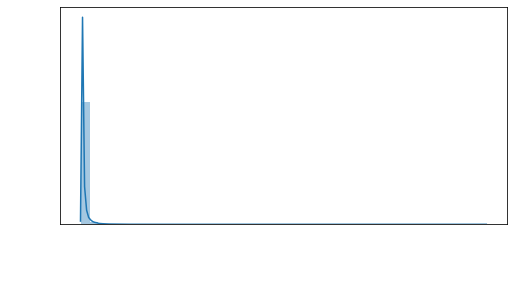

In [71]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [72]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [73]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [74]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [76]:
get_preprocessed_df(card_df)

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [77]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [78]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


<AxesSubplot:>

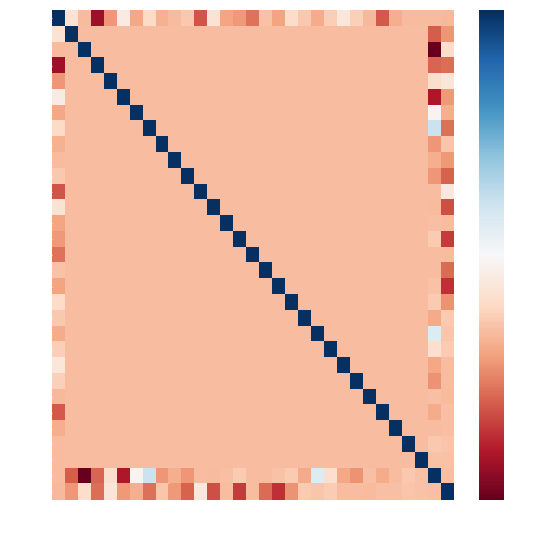

In [79]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap = "RdBu")

In [82]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

In [85]:
outlier_index = get_outlier(df = card_df, column = "V14")
print("이상치 데이터 인덱스 : ", outlier_index)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [88]:
card_df.iloc[outlier_index]["V14"]

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [89]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


In [4]:
from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=0)
# X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ImportError: cannot import name 'SMOTE' from 'imblearn.over_sampling' (unknown location)

# 스태킹 앙상블

In [3]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [5]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [6]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [7]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [10]:
pred = np.array([knn_pred, rf_pred, dt_pred,ada_pred])
print(pred.shape)

(4, 114)


In [12]:
pred = np.transpose(pred)
print(pred.shape)

(114, 4)


In [20]:
y_test.shape

(114,)

In [21]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737
